In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import sqlite3
from sqlalchemy import create_engine, text

## Définition du path

In [2]:
# Spécifiez la chaîne de connexion SQLite (remplacez 'votre_base_de_données.sqlite' par le chemin correct)
db_path = 'C:/Users/Magal/Downloads/database.sqlite'
conn_str = f'sqlite:///{db_path}'

# Créez une connexion à la base de données en utilisant SQLAlchemy
engine = create_engine(conn_str)

## Création du Data Frame voulu, selon les besoins
Quelles équipes se sont le plus améliorées au cours de la période?

In [3]:
# Sélectionnez la colonne team_long_name de la table Team et toutes les colonnes de Team_Attributes lors de la jointure
requete_sql = '''
    SELECT Team.team_long_name, Team_Attributes.*
    FROM Team
    JOIN Team_Attributes ON Team.team_api_id = Team_Attributes.team_api_id
'''

# Utilisez pd.read_sql_query pour lire les données dans un DataFrame Pandas
df_foot_teamatt = pd.read_sql_query(requete_sql, engine)


# Supprimez la colonne 'id' du DataFrame
df_foot_teamatt.drop(columns=['id'], inplace=True)
print(df_foot_teamatt)


        team_long_name  team_fifa_api_id  team_api_id                 date  \
0             FC Aarau               434         9930  2010-02-22 00:00:00   
1             FC Aarau               434         9930  2014-09-19 00:00:00   
2             FC Aarau               434         9930  2015-09-10 00:00:00   
3             Aberdeen                77         8485  2010-02-22 00:00:00   
4             Aberdeen                77         8485  2011-02-22 00:00:00   
...                ...               ...          ...                  ...   
1453  SV Zulte-Waregem             15005        10000  2011-02-22 00:00:00   
1454  SV Zulte-Waregem             15005        10000  2012-02-22 00:00:00   
1455  SV Zulte-Waregem             15005        10000  2013-09-20 00:00:00   
1456  SV Zulte-Waregem             15005        10000  2014-09-19 00:00:00   
1457  SV Zulte-Waregem             15005        10000  2015-09-10 00:00:00   

      buildUpPlaySpeed buildUpPlaySpeedClass  buildUpPlayDribbl

In [4]:
# Regroupez les données par 'team_long_name' et calculez l'écart-type de chaque colonne
ecart_types_par_equipe = df_foot_teamatt.groupby('team_long_name').agg({
    'buildUpPlaySpeed': 'std',
    'buildUpPlayDribbling': 'std',
    'buildUpPlayPassing': 'std',
    'chanceCreationPassing': 'std',
    'chanceCreationCrossing': 'std',
    'chanceCreationShooting': 'std',
    'defencePressure': 'std',
    'defenceAggression': 'std'
}).reset_index()

# Triez le DataFrame par ordre décroissant en fonction de la moyenne de 'buildUpPlaySpeed'
# ecart_types_par_equipe = ecart_types_par_equipe.sort_values(by='buildUpPlaySpeed', ascending=False)

# Affichez le DataFrame résultant
print(ecart_types_par_equipe)

               team_long_name  buildUpPlaySpeed  buildUpPlayDribbling  \
0        1. FC Kaiserslautern         10.419533              4.242641   
1                  1. FC Köln          2.732520              4.242641   
2              1. FC Nürnberg          0.816497              2.828427   
3             1. FSV Mainz 05          8.704405              7.778175   
4                  AC Ajaccio          2.401388              0.000000   
..                        ...               ...                   ...   
280      Xerez Club Deportivo         15.000000                   NaN   
281            Zagłębie Lubin         11.781341                   NaN   
282         Zawisza Bydgoszcz          0.000000              0.000000   
283  Évian Thonon Gaillard FC         10.099505             11.313708   
284             Śląsk Wrocław         13.155480              1.414214   

     buildUpPlayPassing  chanceCreationPassing  chanceCreationCrossing  \
0              4.844241               4.308906   

## Création des graphiques
Sur ces critères : buildUpPlaySpeed, buildUpPlayDribbling, buildUpPlayDribblingClass	buildUpPlayPassing, chanceCreationPassing, chanceCreationCrossing	chanceCreationShooting, defencePressure, defenceAggression et	defenceTeamWidth. Il voudrait un histogramme par critères qui retourne les 5 meilleures equipes. 

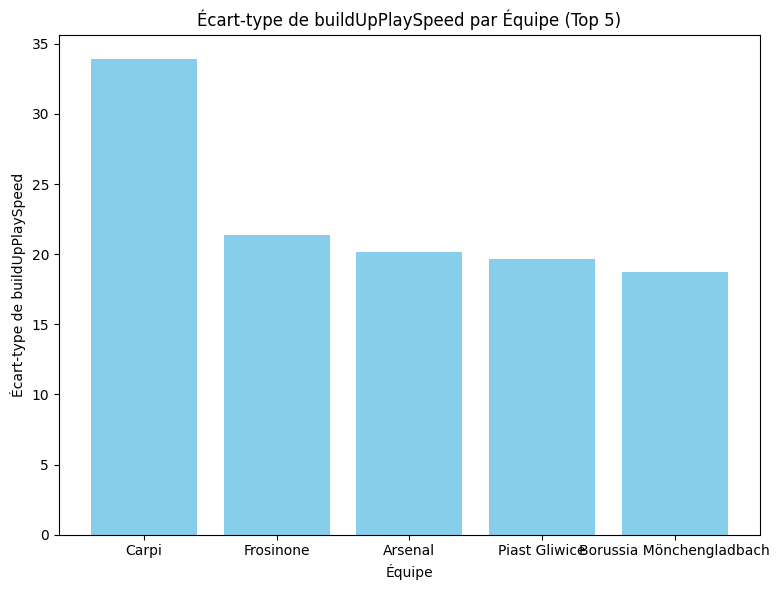

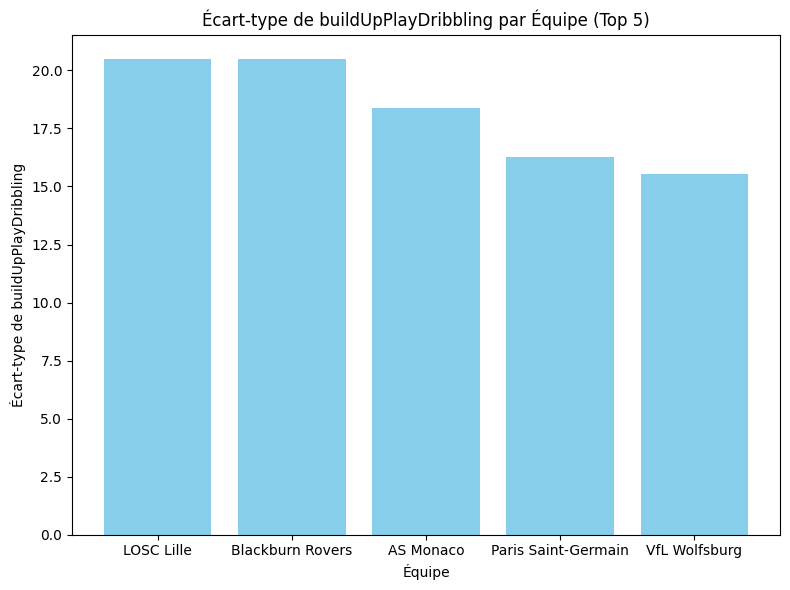

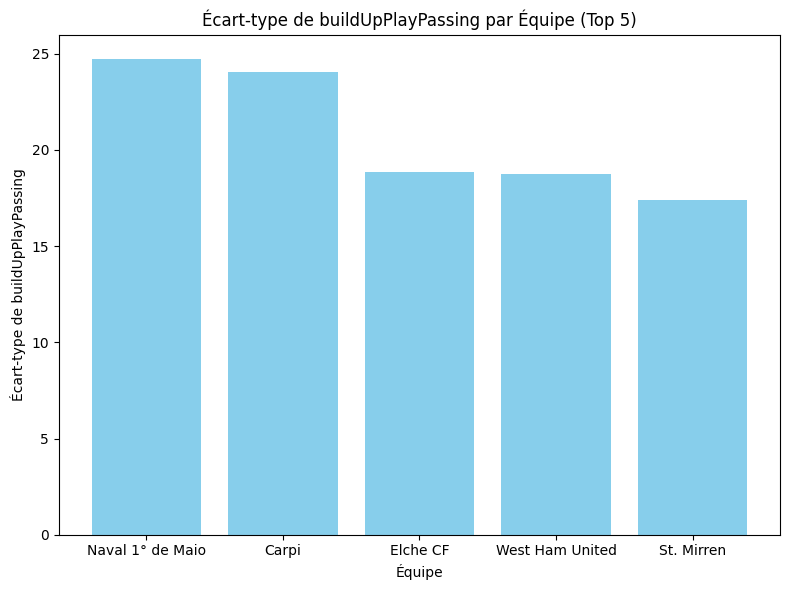

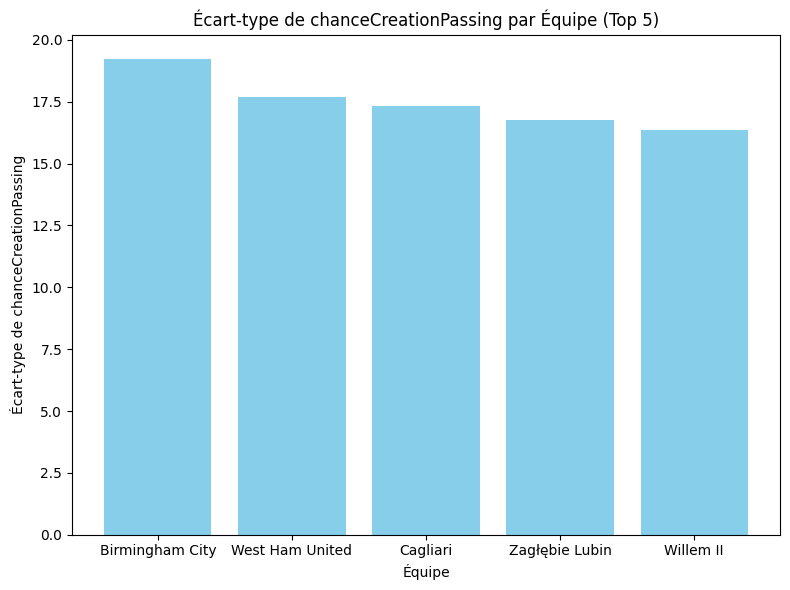

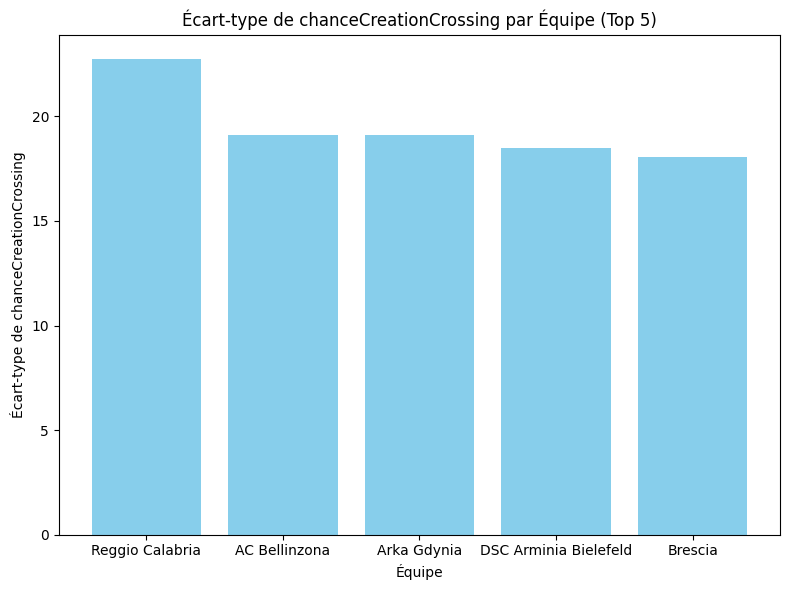

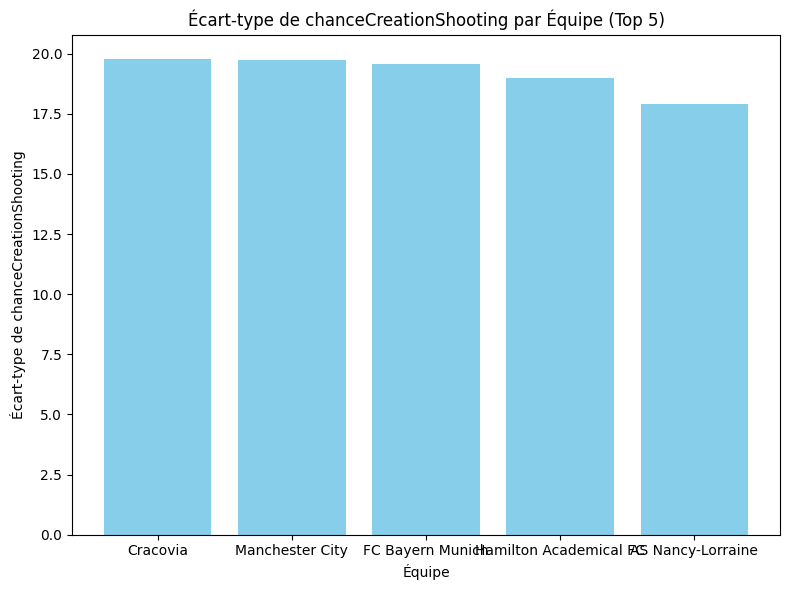

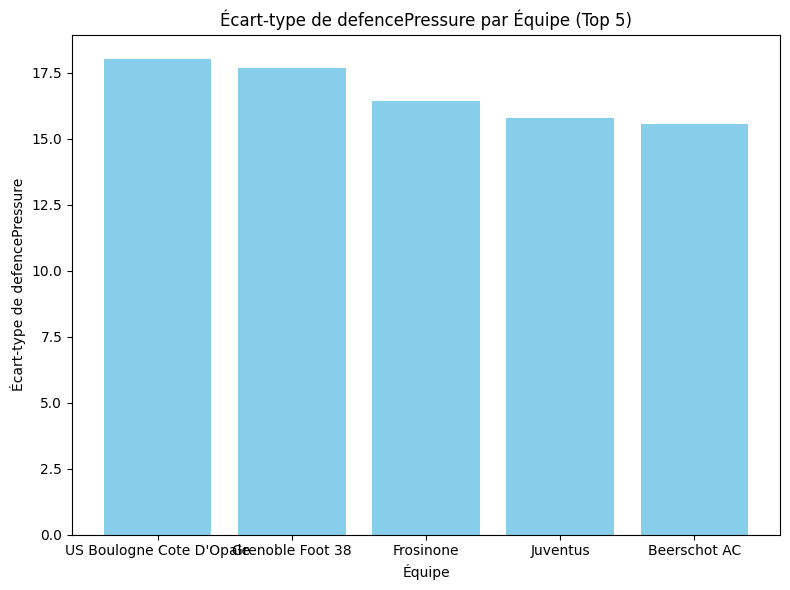

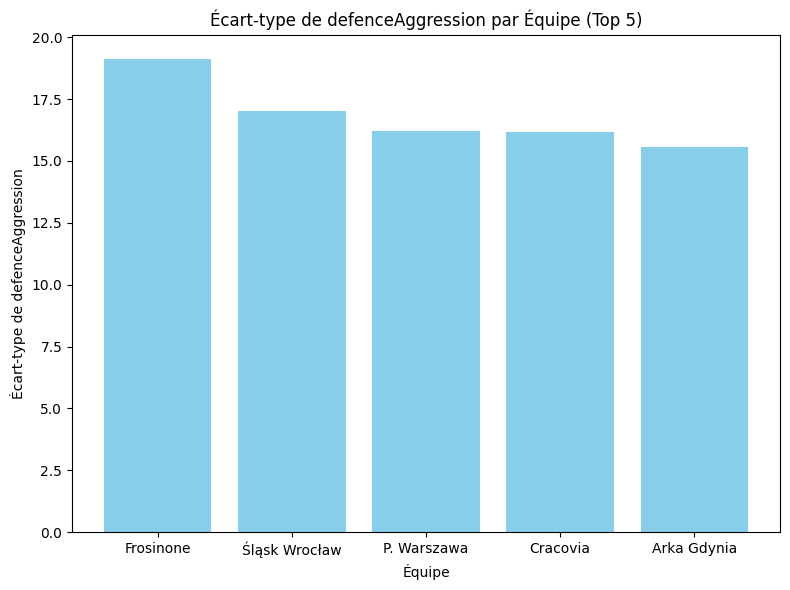

In [5]:
# Supprimez la colonne 'team_long_name' car nous allons l'utiliser comme libellé des équipes
ecart_types_sans_name = ecart_types_par_equipe.drop(columns='team_long_name')

# Obtenez la liste des noms des colonnes
colonnes = ecart_types_sans_name.columns


# Nombre d'équipes à afficher par graphique
nombre_equipes_a_afficher = 5

# Créez un subplot pour chaque colonne
for colonne in colonnes:
    plt.figure(figsize=(8, 6))
    
    # Triez les équipes par écart-type décroissant et sélectionnez les 5 premières
    top_5_equipes = ecart_types_par_equipe.sort_values(by=colonne, ascending=False).head(nombre_equipes_a_afficher)
    
    plt.bar(top_5_equipes['team_long_name'], top_5_equipes[colonne], color='skyblue')
    plt.ylabel(f"Écart-type de {colonne}")
    plt.xlabel("Équipe")
    plt.title(f"Écart-type de {colonne} par Équipe (Top 5)")

    # Agrandir l'axe des noms d'équipes pour une meilleure lisibilité
    plt.tick_params(axis='y', labelsize=10)  # Ajustez la taille des étiquettes

    plt.tight_layout()

    # Sauvegardez le graphique dans un fichier (facultatif)
    # plt.savefig(f'top5_{colonne}_histogram.png')

    # Affichez le graphique
    plt.show()

## Création du graphique final
Et enfin un histogramme global qui retourne le total pour les 5 meilleures equipes sur tous les critères.

In [6]:
# Sélectionnez la colonne Player_Attributes de la table Player et toutes les colonnes de Player_Attributes lors de la jointure
requete_sql = '''
    SELECT Player.player_name, Player_Attributes.*
    FROM Player
    JOIN Player_Attributes ON Player.player_api_id = Player_Attributes.player_api_id
'''

# Utilisez pd.read_sql_query pour lire les données dans un DataFrame Pandas
df_foot_player = pd.read_sql_query(requete_sql, engine)


# Supprimez la colonne 'id' du DataFrame
df_foot_player.drop(columns=['id'], inplace=True)
print(df_foot_player)

               player_name  player_fifa_api_id  player_api_id  \
0       Aaron Appindangoye              218353         505942   
1       Aaron Appindangoye              218353         505942   
2       Aaron Appindangoye              218353         505942   
3       Aaron Appindangoye              218353         505942   
4       Aaron Appindangoye              218353         505942   
...                    ...                 ...            ...   
183973  Zvjezdan Misimovic              102359          39902   
183974  Zvjezdan Misimovic              102359          39902   
183975  Zvjezdan Misimovic              102359          39902   
183976  Zvjezdan Misimovic              102359          39902   
183977  Zvjezdan Misimovic              102359          39902   

                       date  overall_rating  potential preferred_foot  \
0       2016-02-18 00:00:00            67.0       71.0          right   
1       2015-11-19 00:00:00            67.0       71.0          right   


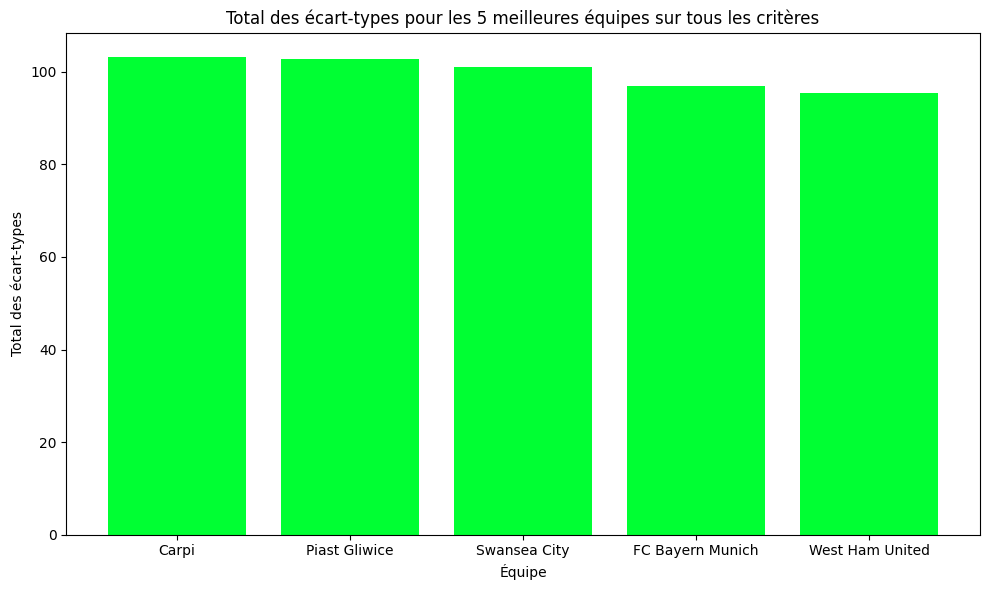

In [7]:
# Calculer le total des écart-types pour chaque équipe
ecart_types_par_equipe['Total'] = ecart_types_sans_name.sum(axis=1)

# Triez les équipes par le total des écart-types décroissant et sélectionnez les 5 premières
top_5_equipes_total = ecart_types_par_equipe.sort_values(by='Total', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_equipes_total['team_long_name'], top_5_equipes_total['Total'], color='#00ff33')
plt.ylabel("Total des écart-types")
plt.xlabel("Équipe")
plt.title("Total des écart-types pour les 5 meilleures équipes sur tous les critères")

# Agrandir l'axe des noms d'équipes pour une meilleure lisibilité
plt.tick_params(axis='y', labelsize=10)  # Ajustez la taille des étiquettes

plt.tight_layout()

# Sauvegardez le graphique dans un fichier (facultatif)
# plt.savefig('total_ecarts_top5.png')

# Affichez le graphique
plt.show()

## Meilleur joueur pénalties

In [8]:
meilleur_player_pen = df_foot_player.groupby(['player_api_id','player_name'])['penalties'].mean().reset_index()
print(meilleur_player_pen.head(1))

   player_api_id        player_name  penalties
0           2625  Patryk Rachwal,18  61.928571


## Création DataFrame Ville/goal domicile/extérieur

In [9]:
# Sélectionnez la colonne Player_Attributes de la table Player et toutes les colonnes de Player_Attributes lors de la jointure
requete_sql = '''
    SELECT Match.home_team_goal, Match.away_team_goal, Country.name
    FROM Match
    JOIN Country ON Match.country_id = Country.id
'''

# Utilisez pd.read_sql_query pour lire les données dans un DataFrame Pandas
df_foot_match = pd.read_sql_query(requete_sql, engine)


# # Supprimez la colonne 'id' du DataFrame
# df_foot_player.drop(columns=['id'], inplace=True)
print(df_foot_match)

       home_team_goal  away_team_goal         name
0                   1               1      Belgium
1                   0               0      Belgium
2                   0               3      Belgium
3                   5               0      Belgium
4                   1               3      Belgium
...               ...             ...          ...
25974               1               0  Switzerland
25975               1               2  Switzerland
25976               2               0  Switzerland
25977               0               0  Switzerland
25978               4               3  Switzerland

[25979 rows x 3 columns]


In [10]:
df_foot_goal = df_foot_match.groupby('name')[['home_team_goal', 'away_team_goal']].mean().sort_values(by=['home_team_goal', 'away_team_goal'])
print(df_foot_goal)

             home_team_goal  away_team_goal
name                                       
Poland             1.394792        1.030208
France             1.402961        1.040132
Portugal           1.408382        1.126218
Scotland           1.429276        1.204496
Italy              1.500829        1.116009
England            1.550987        1.159539
Belgium            1.609375        1.192130
Germany            1.626634        1.274918
Spain              1.631250        1.135855
Switzerland        1.663150        1.266526
Netherlands        1.779820        1.301062


## Création du graphique pour comparaison domicile/extérieur 
Quels facteurs mènent aux plus de victoires ?
Comme par exemple l'impact de jouer à domicile ou à l'extérieur.

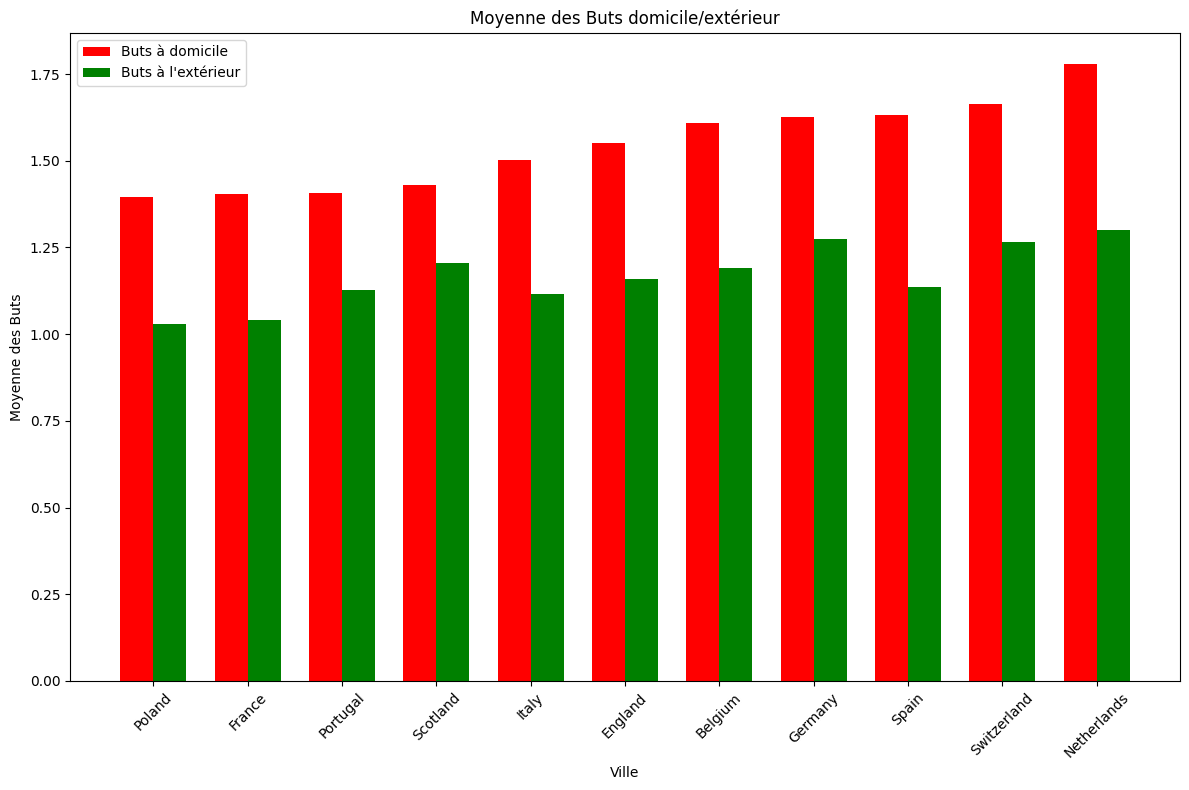

In [11]:
# Vos données (assurez-vous d'avoir exécuté le code précédent pour obtenir df_foot_goal)
data_goal = df_foot_goal

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(12, 8))

# Créer un graphique à barres verticales pour les buts à domicile et à l'extérieur (côte à côte)
width = 0.35
ind = range(len(data_goal))
ax.bar(ind, data_goal['home_team_goal'], width, label='Buts à domicile', color='red')
ax.bar([i + width for i in ind], data_goal['away_team_goal'], width, label='Buts à l\'extérieur', color='green')

# Définir les étiquettes des axes x et les étiquettes des équipes
ax.set_xticks([i + width / 2 for i in ind])
ax.set_xticklabels(data_goal.index, rotation=90)
ax.set_ylabel('Moyenne des Buts')
ax.set_xlabel('Ville')
plt.xticks(rotation = 45)
# Ajouter une légende
ax.legend()

# Définir le titre du graphique
ax.set_title('Moyenne des Buts domicile/extérieur')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [12]:
# Jointure entre les bdd

requete_sql = '''
SELECT Match.country_id,
       Match.home_team_api_id,
       Match.away_team_api_id,
       Match.home_team_goal,
       Match.away_team_goal,
       Team_Attributes.*  -- Sélectionnez toutes les colonnes de la table Team_Attributes
FROM Match
INNER JOIN Team_Attributes ON Match.home_team_api_id = Team_Attributes.team_api_id
                             OR Match.away_team_api_id = Team_Attributes.team_api_id;
'''

# Utilisation de pd.read_sql_query pour lire les données dans un DataFrame Pandas
df_match_team = pd.read_sql_query(requete_sql, engine)
print(df_match_team)

        country_id  home_team_api_id  away_team_api_id  home_team_goal  \
0                1              9987              9993               1   
1                1              9987              9993               1   
2                1              9987              9993               1   
3                1              9987              9993               1   
4                1              9987              9993               1   
...            ...               ...               ...             ...   
284188       24558             10192              9931               4   
284189       24558             10192              9931               4   
284190       24558             10192              9931               4   
284191       24558             10192              9931               4   
284192       24558             10192              9931               4   

        away_team_goal    id  team_fifa_api_id  team_api_id  \
0                    1   149               675  

In [13]:
# merge entre les DataFrame afin de ompléter les données qui nous serons utiles
team_df = pd.read_sql_query('SELECT team_api_id, team_long_name FROM Team', engine)
# Supprimez les doublons dans la table 'Team' pour éviter les erreurs de fusion
team_df = team_df[['team_api_id', 'team_long_name']].drop_duplicates()

# Fusionnez la table 'Match' avec la table 'Team' pour ajouter la colonne 'Team' basée sur 'home_team_api_id'
df_match_team = df_match_team.merge(team_df, left_on='home_team_api_id', right_on='team_api_id', how='left')
df_match_team.rename(columns={'team_long_name': 'Home_Team'}, inplace=True)

# Répétez la fusion pour la colonne 'Away_Team' basée sur 'away_team_api_id'
df_match_team = df_match_team.merge(team_df, left_on='away_team_api_id', right_on='team_api_id', how='left')
df_match_team.rename(columns={'team_long_name': 'Away_Team'}, inplace=True)

# Supprimez les colonnes 'team_api_id' ajoutées temporairement si nécessaire
df_match_team.drop(columns=['team_api_id_x', 'team_api_id_y'], inplace=True)

# Affichez le DataFrame résultant
print(df_match_team)

        country_id  home_team_api_id  away_team_api_id  home_team_goal  \
0                1              9987              9993               1   
1                1              9987              9993               1   
2                1              9987              9993               1   
3                1              9987              9993               1   
4                1              9987              9993               1   
...            ...               ...               ...             ...   
284188       24558             10192              9931               4   
284189       24558             10192              9931               4   
284190       24558             10192              9931               4   
284191       24558             10192              9931               4   
284192       24558             10192              9931               4   

        away_team_goal    id  team_fifa_api_id                 date  \
0                    1   149            

In [14]:
# Chargez la table 'Country' depuis la base de données dans un DataFrame
country_df = pd.read_sql_query('SELECT id, name FROM Country', engine)

# Supprimez les doublons dans le DataFrame pour éviter les erreurs de fusion
country_df = country_df.drop_duplicates()


# Effectuez une fusion (merge) avec le DataFrame 'df_match_team' pour ajouter la colonne 'Country' basée sur 'country_id'
df_match_team = df_match_team.merge(country_df, left_on='country_id', right_on='id', how='left')
df_match_team.rename(columns={'name': 'Country'}, inplace=True)


# Affichez le DataFrame résultant
print(df_match_team)

        country_id  home_team_api_id  away_team_api_id  home_team_goal  \
0                1              9987              9993               1   
1                1              9987              9993               1   
2                1              9987              9993               1   
3                1              9987              9993               1   
4                1              9987              9993               1   
...            ...               ...               ...             ...   
284188       24558             10192              9931               4   
284189       24558             10192              9931               4   
284190       24558             10192              9931               4   
284191       24558             10192              9931               4   
284192       24558             10192              9931               4   

        away_team_goal  id_x  team_fifa_api_id                 date  \
0                    1   149            

In [15]:
# Créez une nouvelle colonne 'Result' en comparant 'home_team_goal' et 'away_team_goal'
df_match_team['Result'] = df_match_team.apply(lambda row: 'Victoire à domicile' if row['home_team_goal'] > row['away_team_goal']
                        else 'Victoire à l\'extérieur' if row['home_team_goal'] < row['away_team_goal']
                        else 'Match nul', axis=1)

# Créez un nouveau DataFrame 'df_match_team2' en sélectionnant uniquement les colonnes pertinentes
# df_match_team2 = df_match_team[['Home_Team', 'Away_Team', 'home_team_goal', 'away_team_goal', 'Result']]

# Affichez le DataFrame 'df_match_team2'
print(df_match_team)

        country_id  home_team_api_id  away_team_api_id  home_team_goal  \
0                1              9987              9993               1   
1                1              9987              9993               1   
2                1              9987              9993               1   
3                1              9987              9993               1   
4                1              9987              9993               1   
...            ...               ...               ...             ...   
284188       24558             10192              9931               4   
284189       24558             10192              9931               4   
284190       24558             10192              9931               4   
284191       24558             10192              9931               4   
284192       24558             10192              9931               4   

        away_team_goal  id_x  team_fifa_api_id                 date  \
0                    1   149            

In [16]:
# Créez une nouvelle colonne 'Winner' en comparant 'home_team_goal' et 'away_team_goal'
df_match_team['Winner'] = df_match_team.apply(lambda row: row['Home_Team'] if row['home_team_goal'] > row['away_team_goal']
                        else row['Away_Team'] if row['home_team_goal'] < row['away_team_goal']
                        else 'Match nul', axis=1)

# Affichez le DataFrame 'df_match_team2' avec la colonne 'Winner'
print(df_match_team)

        country_id  home_team_api_id  away_team_api_id  home_team_goal  \
0                1              9987              9993               1   
1                1              9987              9993               1   
2                1              9987              9993               1   
3                1              9987              9993               1   
4                1              9987              9993               1   
...            ...               ...               ...             ...   
284188       24558             10192              9931               4   
284189       24558             10192              9931               4   
284190       24558             10192              9931               4   
284191       24558             10192              9931               4   
284192       24558             10192              9931               4   

        away_team_goal  id_x  team_fifa_api_id                 date  \
0                    1   149            

In [17]:
# Filtrer le DataFrame pour exclure les matchs nuls
df_match_winners = df_match_team[df_match_team['Winner'] != 'Match nul']


def calculate_goals(row):
    if row['Winner'] == row['Home_Team']:
        return row['home_team_goal']
    elif row['Winner'] == row['Away_Team']:
        return row['away_team_goal']
    else:
        return 0

df_match_winners['Goals'] = df_match_winners.apply(calculate_goals, axis=1)

# Exclure les lignes contenant des valeurs NaN
df_match_winners = df_match_winners.dropna()
df_match_winners['buildUpPlaySpeed'] = df_match_winners['buildUpPlaySpeed'].astype(float)
df_match_winners['Goals'] = df_match_winners['Goals'].astype(float)

C:\Users\Magal\AppData\Local\Temp\ipykernel_18508\976701224.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match_winners['Goals'] = df_match_winners.apply(calculate_goals, axis=1)


## Tableau et graphique d'analyse de la vitesse pour les 10 équipes avec le plus de goals

In [18]:
df_match_winners2 = df_match_winners.groupby(['Winner', 'buildUpPlaySpeed'])['Goals'].max().sort_values(ascending=False).head(10).reset_index()
print(df_match_winners2)

             Winner  buildUpPlaySpeed  Goals
0               PSV              54.0   10.0
1    Real Madrid CF              29.0   10.0
2    Real Madrid CF              45.0   10.0
3    Real Madrid CF              50.0   10.0
4               PSV              67.0   10.0
5               PSV              50.0   10.0
6  FC Bayern Munich              37.0    9.0
7            Celtic              58.0    9.0
8            Celtic              59.0    9.0
9            Celtic              70.0    9.0


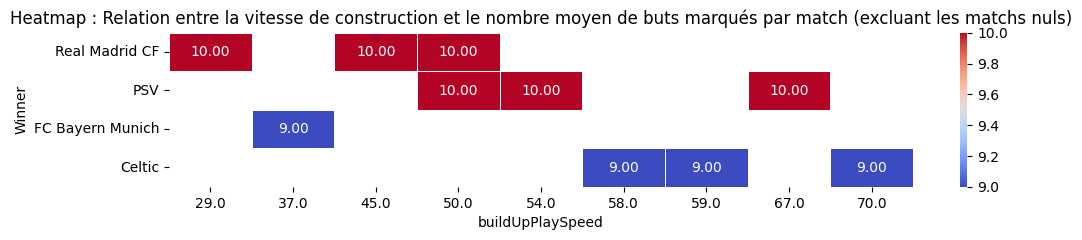

In [31]:
heatmap_data = df_match_winners2.pivot_table(index='Winner', columns='buildUpPlaySpeed', values='Goals', aggfunc='mean')
plt.figure(figsize=(12, len(df_match_winners2['Winner'].unique()) * 0.5))


sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
# Définissez manuellement les limites de l'axe x et de l'axe y
plt.xlim(0, heatmap_data.shape[1])
plt.ylim(0, heatmap_data.shape[0])
plt.title("Heatmap : Relation entre la vitesse de construction et le nombre moyen de buts marqués par match (excluant les matchs nuls)")
plt.show()

## Tableau et graphique d'analyse de la défense pour les 10 équipes avec le plus de goals

In [22]:
df_match_winners3 = df_match_winners.groupby(['Winner', 'defenceTeamWidth'])['Goals'].max().sort_values(ascending=False).head(10).reset_index()
print(df_match_winners)

              Winner  defenceTeamWidth  Goals
0                PSV                40   10.0
1                PSV                48   10.0
2                PSV                55   10.0
3     Real Madrid CF                59   10.0
4     Real Madrid CF                63   10.0
5     Real Madrid CF                65   10.0
6             Celtic                56    9.0
7             Celtic                60    9.0
8             Celtic                63    9.0
9  Tottenham Hotspur                44    9.0


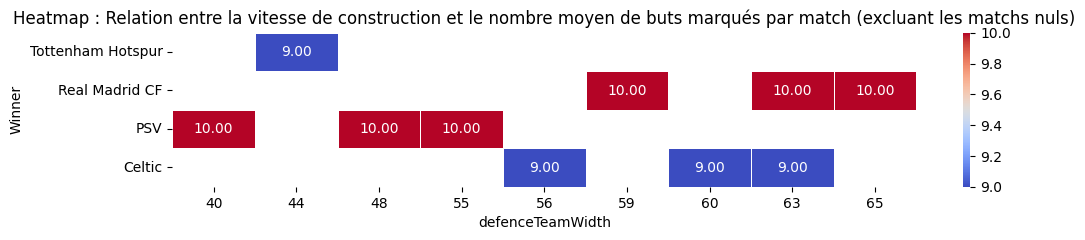

In [32]:
heatmap_data = df_match_winners3.pivot_table(index='Winner', columns='defenceTeamWidth', values='Goals', aggfunc='mean')
plt.figure(figsize=(12, len(df_match_winners2['Winner'].unique()) * 0.5))


sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
# Définissez manuellement les limites de l'axe x et de l'axe y
plt.xlim(0, heatmap_data.shape[1])
plt.ylim(0, heatmap_data.shape[0])
plt.title("Heatmap : Relation entre la vitesse de construction et le nombre moyen de buts marqués par match (excluant les matchs nuls)")
plt.show()

In [20]:
# Fermez la connexion à la base de données
engine.dispose()